In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv('../data/data_msg_only(new tags).csv')
x = data.drop(columns=['label'])
y = data['label']

In [3]:
def display_importances(imp, names):
    imp, names = zip(*sorted(zip(imp, names)))
    plt.barh(range(len(names)), imp)
    plt.yticks(range(len(names)), names)
    plt.show()

In [4]:
features_names = ['characters_count', 'and_or_count',  'blank_line', 'capital_start', 'end_dot', 'imperative_start', 'wrap_to_72',
                  'verb_direct_obj']

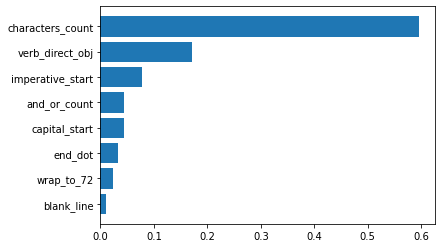

In [5]:
clf = DecisionTreeClassifier()
clf.fit(x, y)
display_importances(clf.feature_importances_, features_names)

---

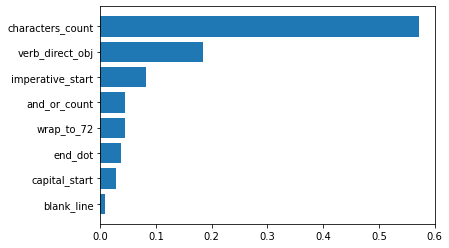

In [6]:
clf = RandomForestClassifier()
clf.fit(x, y)
display_importances(clf.feature_importances_, features_names)

---

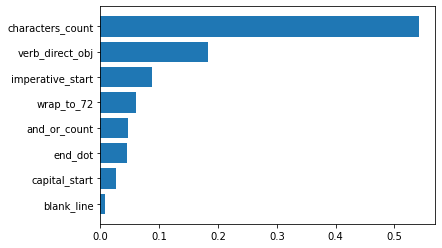

In [7]:
clf = ExtraTreesClassifier()
clf.fit(x, y)
display_importances(clf.feature_importances_, features_names)

---

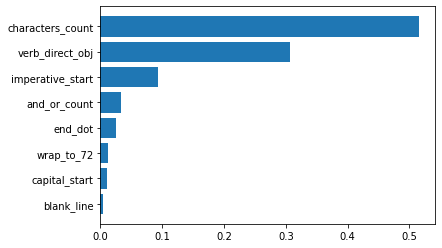

In [8]:
clf = GradientBoostingClassifier()
clf.fit(x, y)
display_importances(clf.feature_importances_, features_names)

---

DecisionTreeClassifier(whole commit): [highest 0.78] [accuracy 0.71] [time 0.56]

DecisionTreeClassifier(message only): [highest 0.72] [accuracy 0.61] [time 0.4]

---

RandomForestClassifier(whole commit): [highest 0.86] [accuracy 0.77] [time 15.11]

RandomForestClassifier(message only): [highest 0.68] [accuracy 0.62] [time 13.4]

---

ExtraTreesClassifier(whole commit): [highest 0.8] [accuracy 0.74] [time 13.71]

ExtraTreesClassifier(message only): [highest 0.68] [accuracy 0.61] [time 11.48]

---

GradientBoostingClassifier(whole commit): [highest 0.84] [accuracy 0.77] [time 38.41]

GradientBoostingClassifier(message only): [highest 0.78] [accuracy 0.67] [time 23.82]


In [9]:
data_good = data[data.label == 'good']
data_neutral = data[data.label == 'neutral']
data_bad = data[data.label == 'bad']

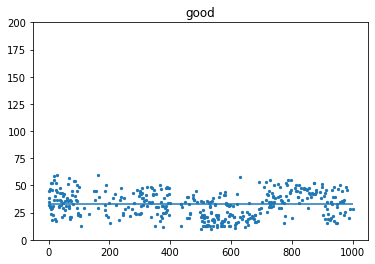

Standard Deviation: 11.707729205651773


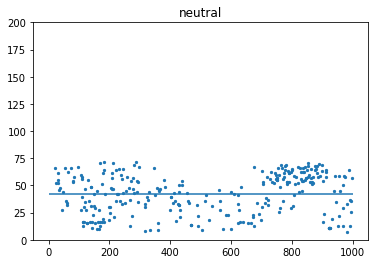

Standard Deviation: 18.30763103462222


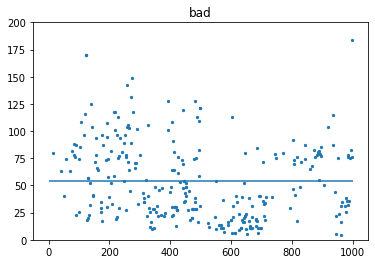

Standard Deviation: 37.37451556916957


In [12]:
plt.ylim(0,200)
plt.title("good")
plt.scatter(x=data_good.index, y=data_good['characters_count'], s=5); 
plt.hlines(y=data_good['characters_count'].mean(), xmin=0, xmax=1000) # Mean line
plt.show()
print('Standard Deviation:', data_good['characters_count'].std())

plt.title("neutral")
plt.ylim(0,200)
plt.scatter(x=data_neutral.index, y=data_neutral['characters_count'], s=5);
plt.hlines(y=data_neutral['characters_count'].mean(), xmin=0, xmax=1000);
plt.show()
print('Standard Deviation:', data_neutral['characters_count'].std())

plt.title("bad")
plt.ylim(0,200)
plt.scatter(x=data_bad.index, y=data_bad['characters_count'], s=5);
plt.hlines(y=data_bad['characters_count'].mean(), xmin=0, xmax=1000);
plt.show()
print('Standard Deviation:', data_bad['characters_count'].std())